# Titanic-Survival : Exploratory Data Analysis & Machine Learning

The dataset Titanic: Machine Learning from Disaster is an indispensable when you are a newbie in Data Science. This dataset allows you to work on the supervised learning, more preciously a classification problem. It is the reason why I would like to introduce you an analysison this one. 
The tutorial are going to divide into three parts. The first part are going to focus on the data analysis and the visualisation of the data. With the second one we are going to see the different algorithms used to tackle with our problem. Finally we are going to expose a few hints to improve the model. 

## Summary :
** 1 | Data Analysis and Visualisation**
* 1.1 Basic information
* 1.2 Missing values
* 1.3 Univariate Analysis
* 1.4 Bivariate Analysis
* 1.5 Feature engineering

** 2 | Machine Learning**
* 2.1 Impute missing value
* 2.2 Encode Categorical features
* 2.3 Scaling numerical features
* 2.4 Logistic Regression
* 2.5 Random Forest
* 2.6 Svm

**  Conlusion **  
* How to improve our model


In [1]:
# Basics
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from collections import OrderedDict
import missingno as msno
from sklearn.preprocessing import StandardScaler

# Sampling
from sklearn.model_selection import train_test_split

# Classifiier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import accuracy_score

%matplotlib inline
sns.set(color_codes=True)
pal = sns.color_palette("Set2", 10)
sns.set_palette(pal)

TitanicTrain = pd.read_csv("../input/train.csv")
TitanicTrain.columns, TitanicTrain.shape 

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'), (891, 12))

# 1 | Data Analysis and Visualisation

**About this Dataset and the competition**  

The dataset has 13 columns with 891 rows. The purpose of this analysis is to test a few models in order to predict if a passenger given of the Titanic has survived or not. So the list of the features that our model will take in input will be [ 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Type'] and the output will be [ 'Survived']. We will usethe feature engineering to create new features starting from the basics features.

**About features**

Here a small description for each features contained in the dataset:

* survival: Survival	0 = No, 1 = Yes
* pclass: A proxy for socio-economic status (1st = Upper, 2nd = Middle, 3rd = Lower)	
* Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd
* sibsp: # of siblings / spouses aboard the Titanic	
* parch: # of parents / children aboard the Titanic	
* ticket: Ticket number
* fare: Passenger fare*
* cabin: Cabin number	
* embarked: Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

Some children travelled only with a nanny, therefore parch=0 for them.  

** 1.1 Basic information**

In [2]:
TitanicTrain.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
TitanicTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


The dataset is composed by 2 features float, 5 integer and 6 object. We can see with that there is a few missing values in the columns "age". With the function describe we can see that the function count 714 values against 891 for the others.

**1.2 Missing values**

Because we have few features we can use the package missingno which allows you to display the completeness of the dataset. It looks there are a lot of missing values for Age and Cabin and only 2 for Embarked. This is interesting information to impute these missing values later to may be improve our prediction model.


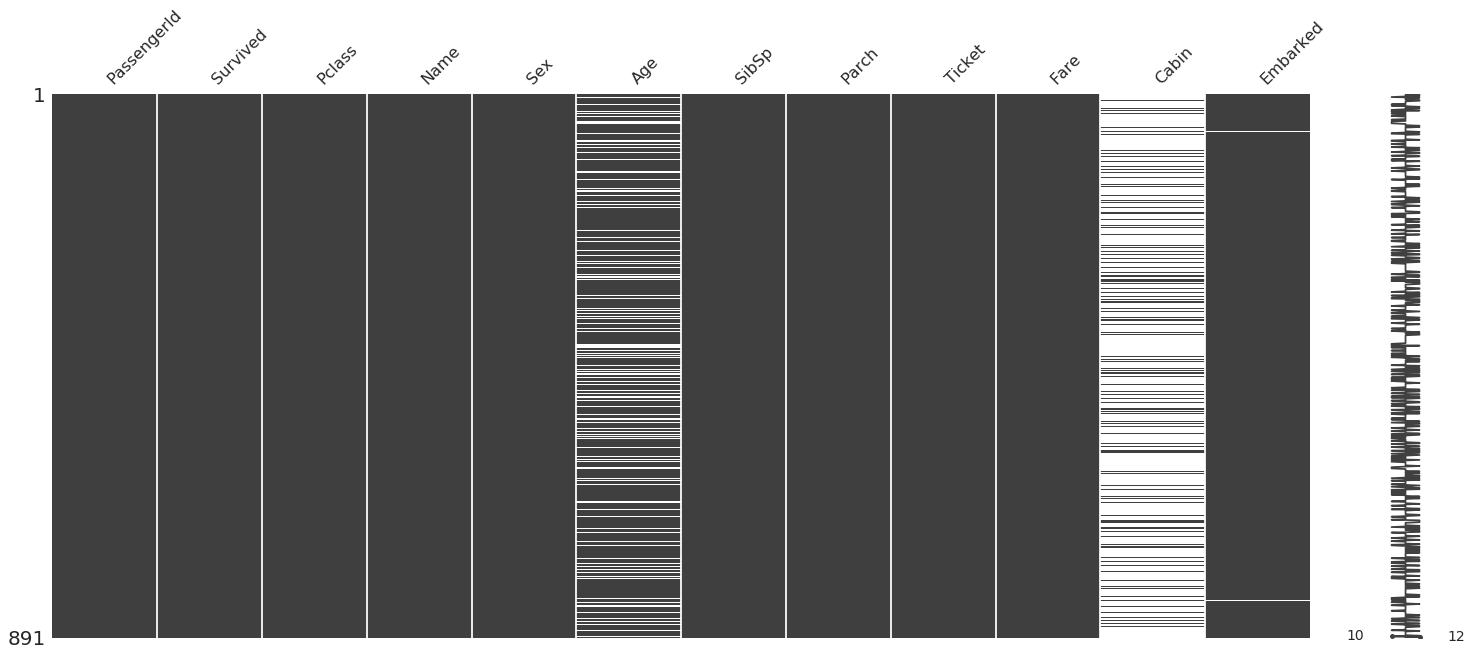

In [4]:
msno.matrix(TitanicTrain)

**1.2 Univariate analysis**

To have a better vision of the data we are going to display our feature with a countplot of seaborn. Show the counts of observations in each categorical bin using bars. The categorical features of our dataset are these are integer and object. We are going to separate our features in two list: categ for the categorical features and conti for the continuous features. The age and the fare are the only two features that we can consider as continuous. In order to plot the distribution of the features with seaborn we use distplot. According to the charts there are no weird values (>100) for "age"  but we can see that the feature "fare" have a large scale and the most of value are between 0 and 100.

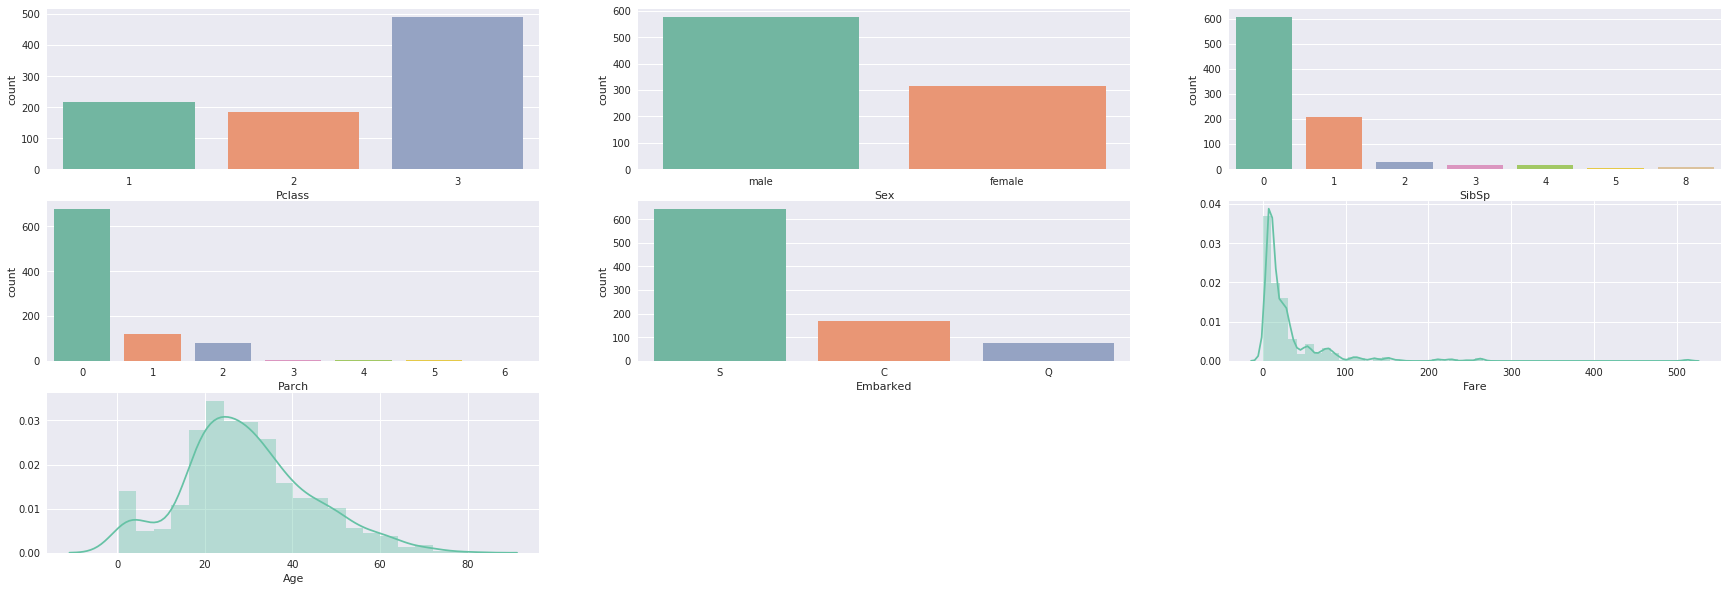

In [5]:
categ =  [ 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
conti = ['Fare', 'Age']

#Distribution
fig = plt.figure(figsize=(30, 10))
for i in range (0,len(categ)):
    fig.add_subplot(3,3,i+1)
    sns.countplot(x=categ[i], data=TitanicTrain);  

for col in conti:
    fig.add_subplot(3,3,i + 2)
    sns.distplot(TitanicTrain[col].dropna());
    i += 1
    
plt.show()
fig.clear()

**1.3 Bivariate analysis**

The next charts show us the repartition of survival (and non-survival) for each features categ and conti. We are going to use others kind of charts to display the relation between 'survival" and our features. It seems that there are lot of "female" who have not survived when we take a look at the 6th chart. WIth the boxplot we can see that there are no outliers in the features "age" (maybe 3-4 observations which are out of the frame but nothing alarming). As concerning the correlation between the features we  can see that the stronger correlation in absolute with "survived" are "fare" and "pclass". The fact of "fare" and "pclass" have a strong correlation in absolute is consistent and it shows that a priori the people with the upper class spend more money (to have a better place).

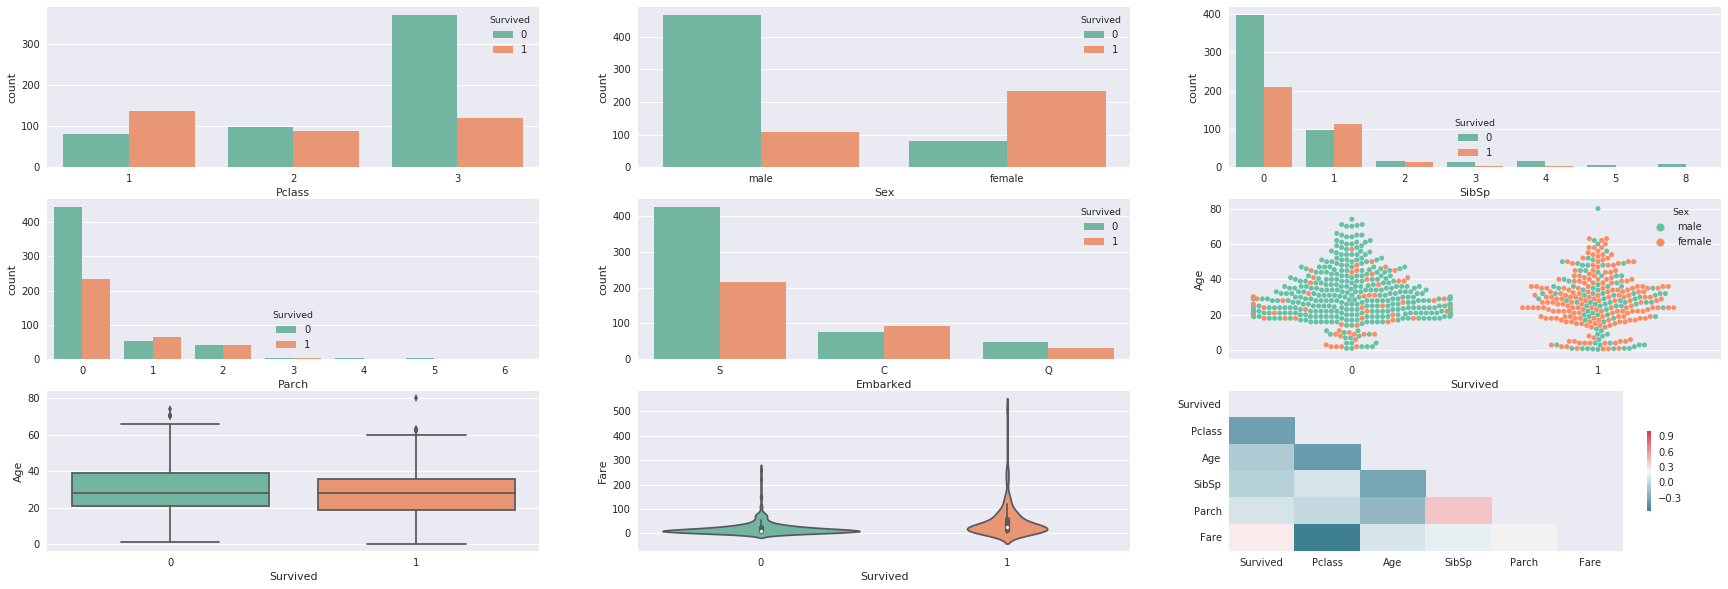

In [6]:
fig = plt.figure(figsize=(30, 10))
i = 1
for col in categ:
    if col != 'Survived':
        fig.add_subplot(3,3,i)
        sns.countplot(x=col, data=TitanicTrain,hue='Survived');
        i += 1

# Box plot survived x age
fig.add_subplot(3,3,6)
sns.swarmplot(x="Survived", y="Age", hue="Sex", data=TitanicTrain);
fig.add_subplot(3,3,7)
sns.boxplot(x="Survived", y="Age", data=TitanicTrain)

# fare and Survived
fig.add_subplot(3,3,8)
sns.violinplot(x="Survived", y="Fare", data=TitanicTrain)

# correlations with the new features
corr = TitanicTrain.drop(['PassengerId'], axis=1).corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
fig.add_subplot(3,3,9)
sns.heatmap(corr, mask=mask, cmap=cmap, cbar_kws={"shrink": .5})
plt.show()
fig.clear()

** 2.4 Feature engineering**

We going to create one new feature from the dataset to see if they can more explain why a passenger survived or not. It is possible to create lot of  new features with this data. But we are going to exploit the data that we can find through the title. I advise you to implement a first model (Quick & Dirty model) before the creation of new features. It is not always interesting to create a new features so you must quantify (with the metrics) if the creation has a positive impact on your model. In this example we start from the assumption that the new feature have a positive impact. We are not sure that the "Title" feature give more information than the sex feature ! 

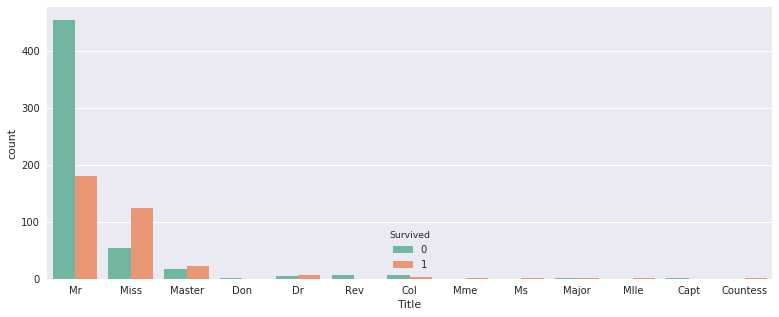

In [7]:
title = ['Mlle','Mrs', 'Mr', 'Miss','Master','Don','Rev','Dr','Mme','Ms','Major','Col','Capt','Countess']

def ExtractTitle(name):
    tit = 'missing'
    for item in title :
        if item in name:
            tit = item
    if tit == 'missing':
        tit = 'Mr'
    return tit

TitanicTrain["Title"] = TitanicTrain.apply(lambda row: ExtractTitle(row["Name"]),axis=1)
plt.figure(figsize=(13, 5))
fig.add_subplot(2,1,1)
sns.countplot(x='Title', data=TitanicTrain,hue='Survived');

# 2 | Machine Learning
Now we are going to pass at the part of Machine Learning. Within this part we are just tested few models. I will expose you a good way to do a robust cross validation through another tutorial. In this example we will implement a basic sampling (70% train vs 30% test). Yet it is not the better way to implement a robust model. Contrary a robust validation this kind of of sampling can bring the overfitting in your model. Keep in mind it is just a "getting started".

**2.1 Impute missing values**

In the first part we have already seen that there are missing values. In generale rules a good imputation is the median (for the numerical features). Yet it is the same thing that the feature engineering: It will be more interesting if you can test different imputations and find the values with the best impact on your metrics. The median is a simple method and you can implement a machine learning method to impute the missing values. For the categorical features we are imputed the missing values by the most frequent values.

In [8]:
# Age
MedianAge = TitanicTrain.Age.median()
TitanicTrain.Age = TitanicTrain.Age.fillna(value=MedianAge)
# Embarked replace NaN with the mode value
ModeEmbarked = TitanicTrain.Embarked.mode()[0]
TitanicTrain.Embarked = TitanicTrain.Embarked.fillna(value=ModeEmbarked)
# Fare have 1 NaN missing value on the Submission dataset
MedianFare = TitanicTrain.Fare.median()
TitanicTrain.Fare = TitanicTrain.Fare.fillna(value=MedianFare)

**2.2 Encode Categorical Features**

Another important part of the preprocessing is the processing of categorcial features. There are several ways to do that and certains are more suited if there are several categories through the features (Entity Embeddings). In our case we are going to use the function get_dummies which allow you to transform the categorical features in binary features for each categorie. You can try the function OneHotEncoder of sklearn to do the same thing. In our example there are several values for the features cabin, so we have decided to binarize this one in order to use get_dummies. The function get_dummies is not recommended if your categorical features have too many categories.

In [9]:
# Cabin
TitanicTrain["Cabin"] = TitanicTrain.apply(lambda obs: "No" if pd.isnull(obs['Cabin']) else "Yes", axis=1)
TitanicTrain = pd.get_dummies(TitanicTrain,drop_first=True,columns=['Sex','Title','Cabin','Embarked'])

**2.3 Scaling numerical features**

The final part of our preprocessing ! The goal of this one is to rescale the numerical features. You can find lot of method through this link http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing. We are used a simple method for the feature Fare and Age.

In [10]:
scale = StandardScaler().fit(TitanicTrain[['Age', 'Fare']])
TitanicTrain[['Age', 'Fare']] = scale.transform(TitanicTrain[['Age', 'Fare']])

In [11]:
Target = TitanicTrain.Survived
Features = TitanicTrain.drop(['Survived','Name','Ticket','PassengerId'],axis=1)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size = 0.3, random_state=42)
Target = TitanicTrain.Survived

MlRes= {}
def MlResult(model,score):
    MlRes[model] = score
    print(MlRes)
    
roc_curve_data = {}
def ConcatRocData(algoname, fpr, tpr, auc):
    data = [fpr, tpr, auc]
    roc_curve_data[algoname] = data    

**2.4 Logistic Regression Classifier**

In [12]:
# Logistic Regression : 
logi_reg = LogisticRegression()
# Fit the regressor to the training data
logi_reg.fit(X_train, y_train)
# Predict on the test data: y_pred
y_pred = logi_reg.predict(X_test)

# Score / Metrics
accuracy = logi_reg.score(X_test, y_test)
MlResult('Logistic Regression',accuracy)

{'Logistic Regression': 0.8283582089552238}


**2.5 Random Forest Classifier**

In [13]:
# Create a random Forest Classifier instance
rfc = RandomForestClassifier(n_estimators = 100)
# Fit to the training data
rfc.fit(X_train, y_train)
# Predict on the test data: y_pred
y_pred = rfc.predict(X_test)

# Score / Metrics
accuracy = rfc.score(X_test, y_test) # = accuracy
MlResult('Random Forest',accuracy)

{'Logistic Regression': 0.8283582089552238, 'Random Forest': 0.7985074626865671}


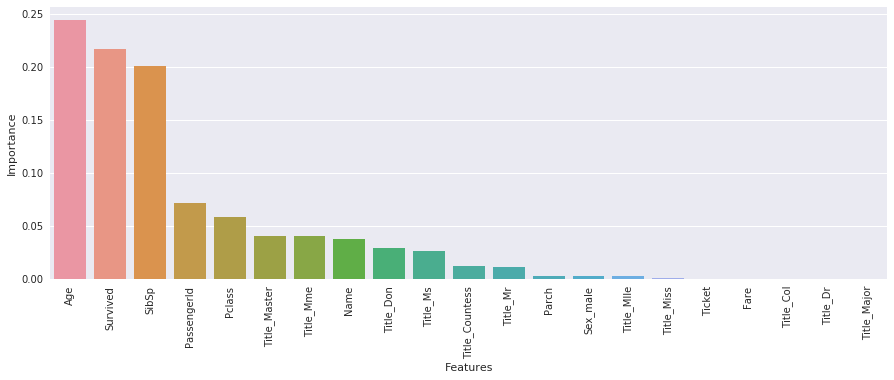

In [14]:
#Features importance
def FeaturesImportance(data,model):
    features = data.columns.tolist()
    fi = model.feature_importances_
    sorted_features = {}
    for feature, imp in zip(features, fi):
        sorted_features[feature] = round(imp,3)

    # sort the dictionnary by value
    sorted_features = OrderedDict(sorted(sorted_features.items(),reverse=True, key=lambda t: t[1]))

    #for feature, imp in sorted_features.items():
        #print(feature+" : ",imp)

    dfvi = pd.DataFrame(list(sorted_features.items()), columns=['Features', 'Importance'])
    #dfvi.head()
    plt.figure(figsize=(15, 5))
    sns.barplot(x='Features', y='Importance', data=dfvi);
    plt.xticks(rotation=90) 
    plt.show()
    
#Features importance
FeaturesImportance(TitanicTrain,rfc)

**2.6 Support Vector Machines (SVM)**

In [15]:
svm = SVC(probability=True)
# Fit to the training data
svm.fit(X_train, y_train)
# Predict on the test data: y_pred
y_pred = svm.predict(X_test)

# Score / Metrics
accuracy = svm.score(X_test, y_test) # = accuracy
MlResult('SVC',accuracy)

{'Logistic Regression': 0.8283582089552238, 'Random Forest': 0.7985074626865671, 'SVC': 0.835820895522388}


**Conclusion :**

In [16]:
# print score for each model
#for algo,score in MlRes.items():
#    print(algo+" : {}".format(round(score,3)))
res = pd.DataFrame(list(MlRes.items()), columns=['Model', 'Score']).sort_values("Score", ascending=False)
print(res)

                 Model     Score
2                  SVC  0.835821
0  Logistic Regression  0.828358
1        Random Forest  0.798507


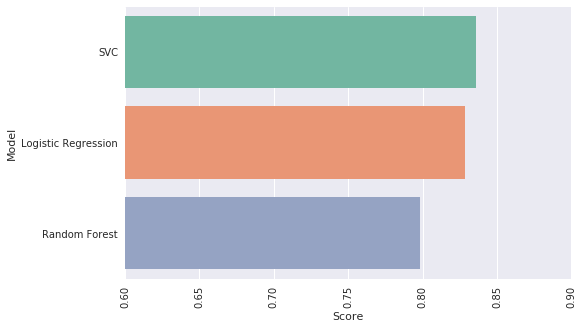

In [17]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Score', y='Model', data=res);
plt.xticks(rotation=90) 
plt.xlim([0.6, 0.9])
plt.show()

Like we have said previously it is possible to improve our code with several tasks for example it will be good to use a robust cross validation (to reduce the variance and don't overfit), it would be nice to reduce the number of features. As you can see some features have a zero importance. We can also tune parameters for each model. and so on..